In [1]:
import numpy as np
import time
from Crypto.Util import number
import math
import RSA

In [2]:
def BFA(n, e):
    p = 2
    while(n%p != 0):
        p += 1
    q = n//p
    phi = (p-1)*(q-1)
    d = RSA.InvertModulo(e, phi)
    return p, q, d

In [3]:
#generate prime numbers from size 8 bits all way up to 50 bits
#this function genarated primes numbers between two given number of bits
def genPrimes(start, end, step):
    if (start > end):
        temp = start
        start = end
        end = temp
    primesArray = []
    for j in range(start , end+1 , step):
        primesArray.append(number.getPrime(j))
    return primesArray

In [17]:
times = []
for i in range(8, 50, 2):
    p = number.getPrime(i)
    q = number.getPrime(i)
    e = number.getPrime(i-4)
    n = p*q
    with open('keys.txt', 'a') as f:
        f.write(f"\np: {p}")
        f.write(f"\nq: {q}")
        f.write(f"\ne: {e}")
        f.write(f"\nn: {n}")
        f.write(f"\nkey size: {i*2}")
        f.write("\n=========================")
    starttime = time.time()
    resultedP, resultedQ, resultedD =  BFA(n, e)
    executiontime = time.time()-starttime
    times.append(executiontime)
    with open('BFAresults.txt', 'a') as f:
        f.write(f"\nresultedP: {resultedP}")
        f.write(f"\nresultedQ: {resultedQ}")
        f.write(f"\nresultedD: {resultedD}")
        f.write(f"\nexecutiontime: {executiontime}")
        f.write(f"\nkey size: {i*2}")
        f.write("\n=========================")
    print(executiontime)

9.012222290039062e-05
0.0002377033233642578
0.0010690689086914062
0.0017194747924804688
0.011399507522583008
0.040964365005493164
0.1448345184326172
0.6988558769226074
2.385355234146118
10.467477560043335
41.88689303398132
140.98209190368652
288.2198488712311
1394.38902592659
5015.014265537262


KeyboardInterrupt: 

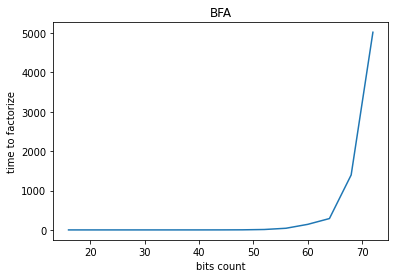

In [20]:
newtimes = times
import matplotlib.pyplot as plt
plt.plot(np.arange(16, 73, 4), newtimes)
plt.xlabel('bits count')
plt.ylabel('time to factorize')
plt.title('BFA')
plt.show()